In [ ]:
Rishik Reddy Bandi
B2-39
220968300

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bollywood.csv")

In [2]:
#1. How many records are present in the dataset?
num_rec = len(df)
print("Number of records: ", num_rec)

Number of records:  149


In [3]:
#2. How many movies got released in each genre? Sort number of releases in each genre in descending order. 
df['Genre'] = df['Genre'].str.strip()
genre_count = df['Genre'].value_counts().sort_values(ascending=False)
print("Number of movies released in each genre: ")
print(genre_count)

Number of movies released in each genre: 
Comedy      36
Drama       35
Thriller    29
Romance     25
Action      24
Name: Genre, dtype: int64


In [4]:
#3. Which genre had highest number of releases? 
highest_releases = genre_count.idxmax()
print("Genre with the highest number of releases:", highest_releases)

Genre with the highest number of releases: Comedy


In [5]:
#4. How many movies in each genre got released in different release times like long weekend, festive season, etc. (Note: Do a cross tabulation between Genre and ReleaseTime.
rt_crosstab = pd.crosstab(df.Genre,df.ReleaseTime)
print("Crosstab of movies by Genre and ReleaseTime:")
print(rt_crosstab)

Crosstab of movies by Genre and ReleaseTime:
ReleaseTime  FS  HS  LW   N
Genre                      
Action        3   3   3  15
Comedy        3   5   5  23
Drama         4   6   1  24
Romance       3   3   4  15
Thriller      4   1   2  22


In [6]:
#5. Which month of the year, maximum number movie releases are seen? (Note: Extract a new column called month from ReleaseDate column.)
df['Release Date'] = pd.to_datetime(df['Release Date'])
df['Month'] = df['Release Date'].dt.month
max_rm = df['Month'].value_counts().idxmax()
print("Month with the maximum number of movie releases:", max_rm)

Month with the maximum number of movie releases: 1


In [7]:
#6. Which month of the year typically sees most releases of high budgeted movies, that is, movies with budget of 25 crore or more? 
hb_rm = df[df['Budget'] >= 25]['Month'].value_counts().idxmax()
print("Month with the most releases of high-budgeted movies:", hb_rm)

Month with the most releases of high-budgeted movies: 2


In [8]:
#7. Which are the top 10 movies with maximum return on investment (ROI)? Calculate return on investment (ROI) as (BoxOfficeCollection – Budget) / Budget.
df['ROI'] = (df['BoxOfficeCollection'] - df['Budget']) / df['Budget']
top_10 = df.nlargest(10, 'ROI')[['MovieName', 'ROI']]
print("Top 10 movies with maximum Return On Investment:")
print(top_10)

Top 10 movies with maximum Return On Investment:
                     MovieName       ROI
64                  Aashiqui 2  8.166667
89                          PK  7.647059
132                Grand Masti  7.514286
135               The Lunchbox  7.500000
87                      Fukrey  6.240000
58                    Mary Kom  5.933333
128                     Shahid  5.666667
37   Humpty Sharma Ki Dulhania  5.500000
101         Bhaag Milkha Bhaag  4.466667
115            Chennai Express  4.266667


In [9]:
#8. Do the movies have higher ROI if they get released on festive seasons or long weekend? Calculate the average ROI for different release times. 
avg_roi_rt = df.groupby(by='ReleaseTime').ROI.mean()
print("Average ROI for different release times:")
print(avg_roi_rt)

Average ROI for different release times:
ReleaseTime
FS    0.973853
HS    0.850867
LW    1.127205
N     0.657722
Name: ROI, dtype: float64


In [10]:
#9. Is there a correlation between box office collection and YouTube likes? Is the correlation positive or negative?
corr_bo_likes = df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
print("Correlation between Box Office Collection and YouTube Likes:", corr_bo_likes)

Correlation between Box Office Collection and YouTube Likes: 0.6825165877731297


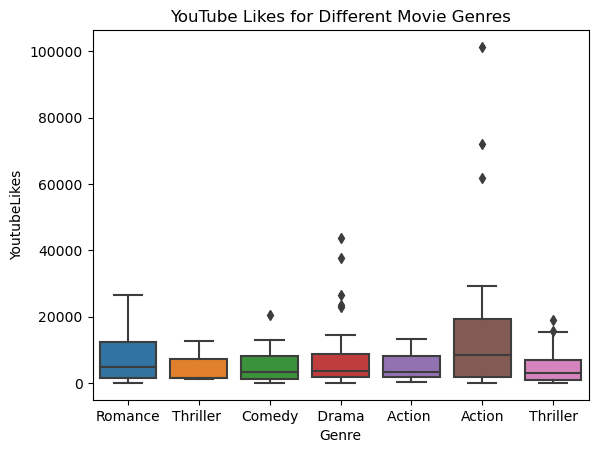

In [11]:
#10. Which genre of movies typically sees more YouTube likes? Draw boxplots for eachgenre of movies to compare.
df = pd.read_csv("bollywood.csv")
sns.boxplot(x='Genre', y='YoutubeLikes', data=df)
plt.title('YouTube Likes for Different Movie Genres')
plt.show()

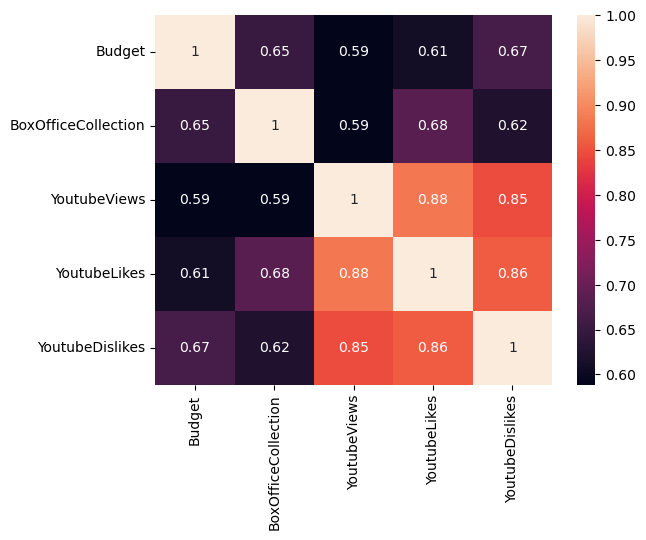

In [12]:
#11. Which of the variables among Budget, BoxOfficeCollection, YoutubeView, YoutubeLikes, YoutubeDislikes are highly correlated? Note: Draw pair plot or heatmap. 
df = pd.read_csv("bollywood.csv")
sns.heatmap(df[['Budget', 'BoxOfficeCollection', 'YoutubeViews', 'YoutubeLikes', 'YoutubeDislikes']].corr(),annot=True)
plt.show()

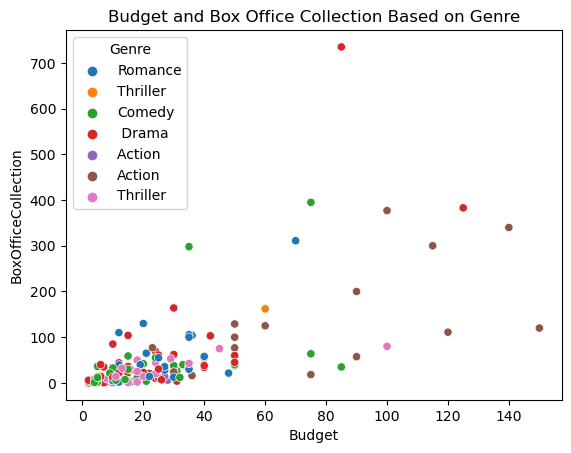

In [13]:
#12. During 2013−2015 period, highlight the genre of movies and their box office collection? Visualize with best fit graph. 
#13. Visualize the Budget and Box office collection based on Genre
df = pd.read_csv("bollywood.csv")
sns.scatterplot(x='Budget', y='BoxOfficeCollection', data=df, hue='Genre')
plt.title('Budget and Box Office Collection Based on Genre')
plt.show()

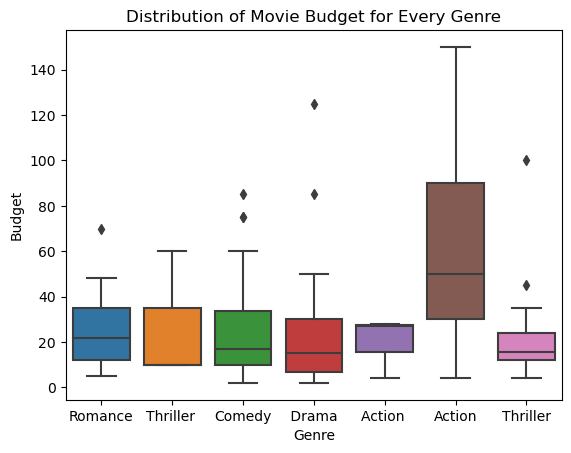

In [14]:
#14. Find the distribution of movie budget for every Genre.
sns.boxplot(x='Genre', y='Budget', data=df)
plt.title('Distribution of Movie Budget for Every Genre')
plt.show()

2013    67
2014    70
2015    12
Name: Year, dtype: int64


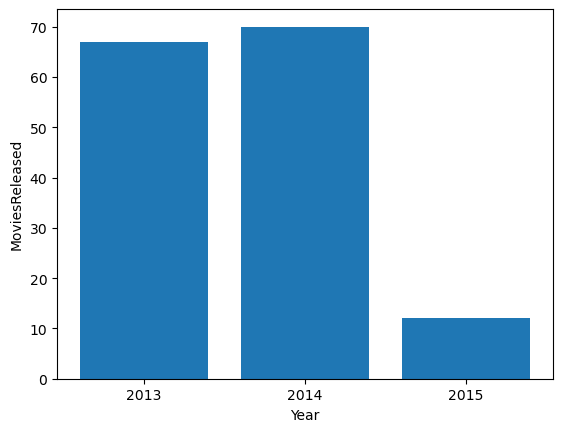

In [15]:
#15. During 2013−2015, find the number of movies released in every year. Also, visualize with best fit graph
df['Year'] = pd.to_datetime(df['Release Date']).dt.year
mpy= df['Year'].value_counts().sort_index()
print(mpy)

years=['2013','2014','2015']

plt.bar(years, mpy)
plt.xlabel('Year')
plt.ylabel('MoviesReleased')
plt.show()